In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Section A - Geometric Transformations

1. a)

In [2]:
# Load the image and display it and its shape
image = cv2.imread("name.png")
cv2.imshow("Original Image", image)
print(f"Image Shape: {image.shape}")
cv2.waitKey(0)
cv2.destroyAllWindows()

Image Shape: (648, 1152, 3)


1. b)

In [3]:
# Covert the image to greyscale and display it and its shape
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale Image", gray_image)
print(f"Grayscale Image Shape: {gray_image.shape}")
cv2.waitKey(0)
cv2.destroyAllWindows()

Grayscale Image Shape: (648, 1152)


1. c)

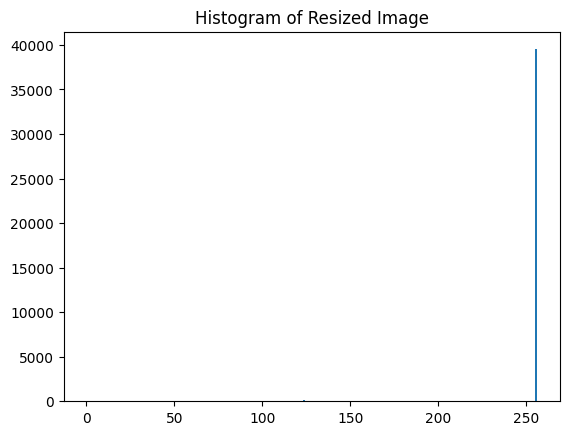

In [4]:
# Resize the grayscale image to (200x200) and plot its histogram
resized_image = cv2.resize(gray_image, (200, 200))
plt.hist(resized_image.ravel(), 256, [0, 256])
plt.title("Histogram of Resized Image")
plt.show()

1. d)

In [5]:
# Perform the following geometric transformations on the greyscaled resized image:
# Rotation (60° and 140°)
rows, cols = resized_image.shape
M_60 = cv2.getRotationMatrix2D((cols/2, rows/2), 60, 1)
rotated_60 = cv2.warpAffine(resized_image, M_60, (cols, rows))

M_140 = cv2.getRotationMatrix2D((cols/2, rows/2), 140, 1)
rotated_140 = cv2.warpAffine(resized_image, M_140, (cols, rows))

cv2.imshow("Rotated 60 Degrees", rotated_60)
cv2.imshow("Rotated 140 Degrees", rotated_140)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Translation (to the four corners of the image)
tx, ty = 50, 50
M_translation = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(resized_image, M_translation, (cols, rows))

cv2.imshow("Translated Image", translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Vertical Shearing
shear_matrix_vertical = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_vertical = cv2.warpAffine(resized_image, shear_matrix_vertical, (cols + 100, rows))
cv2.imshow("Vertically Sheared Image", sheared_vertical)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Horizontal Shearing
shear_matrix_horizontal = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_horizontal = cv2.warpAffine(resized_image, shear_matrix_horizontal, (cols, rows + 100))

cv2.imshow("Horizontally Sheared Image", sheared_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. (a)

In [6]:
# Color spaces are mathematical representations of colors.
# There are various color spaces, including RGB, HSV, YCrCb, and Lab. These spaces help represent colors in ways that are meaningful for different applications such as image processing.

# Display different color spaces
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

cv2.imshow("HSV Image", hsv_image)
cv2.imshow("YCrCb Image", ycrcb_image)
cv2.imshow("Lab Image", lab_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. (b)

In [7]:
# Three common methods for resizing an image are:
# Nearest-Neighbor Interpolation: Assigns to each new pixel location the intensity of its nearest neighbor in the original image. Fast but can produce blocky images.
# Bilinear Interpolation: Assigns to each new location the intensity based on its 4 nearest neighbor in the original image. Smoother than nearest-neighbor, but slower.
# Bicubic Interpolation: Assigns to each new location the intensity based on its 8 nearest neighbor in the original image. Produces even smoother images than bilinear, but is the slowest of the three.

# Nearest Neighbor Interpolation
nearest_resized = cv2.resize(gray_image, (200, 200), interpolation=cv2.INTER_NEAREST)

# Bilinear Interpolation
bilinear_resized = cv2.resize(gray_image, (200, 200), interpolation=cv2.INTER_LINEAR)

# Bicubic Interpolation
bicubic_resized = cv2.resize(gray_image, (200, 200), interpolation=cv2.INTER_CUBIC)

cv2.imshow("Nearest Neighbor", nearest_resized)
cv2.imshow("Bilinear", bilinear_resized)
cv2.imshow("Bicubic", bicubic_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. (c)

In [8]:
#Down-sampling refers to reducing the resolution of the image (i.e., reducing the number of pixels), while 
#Quantization refers to reducing the number of distinct intensity levels (i.e., reducing the bit depth of each pixel).

# Down-sampling the image
downsampled_image = gray_image[::2, ::2]  # Reduce the resolution by half

# Quantize the image
quantized_image = np.floor(gray_image / 255) * 32  # Reducing the bit depth to 5 bits

cv2.imshow("Downsampled Image", downsampled_image)
cv2.imshow("Quantized Image", quantized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. (d)

In [ ]:
image = cv2.imread("name.png")

In [9]:
def rotate_image(image, angle):
    # Get image dimensions
    h, w = image.shape[:2]
    # Find the center of the image
    cx, cy = w // 2, h // 2

    # Create an empty output image
    rotated_image = np.zeros_like(image)

    # Convert the angle to radians
    theta = np.radians(angle)
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)

    # Iterate over each pixel in the output image
    for i in range(h):
        for j in range(w):
            # Calculate the coordinates relative to the center
            x = j - cx
            y = i - cy

            # Apply the inverse rotation matrix
            new_x = int(cos_theta * x + sin_theta * y + cx)
            new_y = int(-sin_theta * x + cos_theta * y + cy)

            # Check if the new coordinates are within the bounds of the original image
            if 0 <= new_x < w and 0 <= new_y < h:
                rotated_image[i, j] = image[new_y, new_x]

    return rotated_image

# Rotate the image
rotated = rotate_image(image, 60)
cv2.imshow("Rotated Image", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
def translate_image(image, tx, ty):
    h, w = image.shape[:2]
    translated_image = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            # Calculate new position
            new_x = j + tx
            new_y = i + ty

            # Check if the new position is within bounds
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_image[new_y, new_x] = image[i, j]

    return translated_image

# Translate the image
translated = translate_image(image, 50, 50)
cv2.imshow("Translated Image", translated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
def shear_image(image, shear_factor, direction):
    h, w = image.shape[:2]
    sheared_image = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            if direction == "horizontal":
                new_x = int(j + shear_factor * i)
                new_y = i
            elif direction == "vertical":
                new_x = j
                new_y = int(i + shear_factor * j)

            # Check if the new position is within bounds
            if 0 <= new_x < w and 0 <= new_y < h:
                sheared_image[new_y, new_x] = image[i, j]

    return sheared_image

# Apply vertical shearing
vertical_sheared = shear_image(image, 0.5, direction="vertical")

# Apply horizontal shearing
horizontal_sheared = shear_image(image, 0.5, direction="horizontal")

cv2.imshow("Vertical Sheared Image", vertical_sheared)
cv2.imshow("Horizontal Sheared Image", horizontal_sheared)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. (e)

In [12]:
# Image registration involves aligning two or more images so that they overlap properly. The process typically involves:

# Feature detection: Finding key points or features in the images (e.g., corners).
# Feature matching: Matching these features between the images.
# Transformation estimation: Calculating the transformation matrix that aligns the images.
# Image warping: Applying the transformation to one of the images to align it with the other.

def image_registration(source_img, reference_img):
    # Convert to grayscale
    gray_source = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY)
    gray_reference = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray_source, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray_reference, None)

    # Match descriptors using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches based on distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract matched points
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography matrix
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp the source image to align with the reference image
    h, w = reference_img.shape[:2]
    aligned_img = cv2.warpPerspective(source_img, M, (w, h))

    return aligned_img

# Load source and reference images
source_img = horizontal_sheared
reference_img = cv2.imread("name.png")

# Perform image registration
aligned_image = image_registration(source_img, reference_img)
cv2.imshow("Aligned Image", aligned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Section B - Image Intensity

1. (a)

In [13]:
for i in range(1, 5):
    # Load images with variations
    image_morning = cv2.imread("image"+str(i)+"_morning.jpeg")
    image_afternoon = cv2.imread("image"+str(i)+"_afternoon.jpeg")
    image_sunset = cv2.imread("image"+str(i)+"_sunset.jpeg")

    # Display the images and their shape
    cv2.imshow("Image"+str(i)+" Morning", image_morning)
    print(f"Image{i} Morning Shape: {image_morning.shape}")
    cv2.imshow("Image"+str(i)+" Afternoon", image_afternoon)
    print(f"Image{i} Afternoon Shape: {image_afternoon.shape}")
    cv2.imshow("Image"+str(i)+" Sunset", image_sunset)
    print(f"Image{i} Sunset Shape: {image_sunset.shape}")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Image1 Morning Shape: (1200, 1600, 3)
Image1 Afternoon Shape: (1200, 1600, 3)
Image1 Sunset Shape: (1200, 1600, 3)
Image2 Morning Shape: (1200, 1600, 3)
Image2 Afternoon Shape: (1200, 1600, 3)
Image2 Sunset Shape: (1200, 1600, 3)
Image3 Morning Shape: (1600, 1200, 3)
Image3 Afternoon Shape: (1600, 1200, 3)
Image3 Sunset Shape: (1600, 1200, 3)
Image4 Morning Shape: (1200, 1600, 3)
Image4 Afternoon Shape: (1200, 1600, 3)
Image4 Sunset Shape: (1200, 1600, 3)


1. (b)

In [14]:
def gamma_transformation(image, gamma=2.0):
    # Gamma Transformation
    gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype="uint8")
    return gamma_corrected

def negative_transformation(image):
    # Negative Transformation
    negative_image = 255 - image
    return negative_image

def logarithmic_transformation(image):
    # Logarithmic Transformation
    c = 255 / np.log(1 + np.max(image))
    log_transformed = c * (np.log(1 + image + 1e3))
    return np.array(log_transformed, dtype="uint8")

def contrast_stretching(image):
    # Contrast Stretching
    min_val, max_val = np.min(image), np.max(image)
    contrast_stretched = (image - min_val) * (255 / (max_val - min_val))
    return np.array(contrast_stretched, dtype="uint8")

In [15]:
# Apply the transformations for image
for i in range(1, 5):
    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.imread(f"image{i}{j}.jpeg")

        gamma_corrected = gamma_transformation(image)

        # Display the result
        cv2.imshow("Gamma Corrected "+j[1:], gamma_corrected)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.imread(f"image{i}{j}.jpeg")

        negative_image = negative_transformation(image)

        # Display the result
        cv2.imshow("Negative Image "+j[1:], negative_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.imread(f"image{i}{j}.jpeg")

        log_transformed = logarithmic_transformation(image)

        # Display the result
        cv2.imshow("Logarithmic Transformed "+j[1:], log_transformed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.imread(f"image{i}{j}.jpeg")

        contrast_stretched = contrast_stretching(image)

        # Display the result
        cv2.imshow("Contrast Stretched "+j[1:], contrast_stretched)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

1. (c)

Image1 Morning Shape: (1200, 1600, 3)


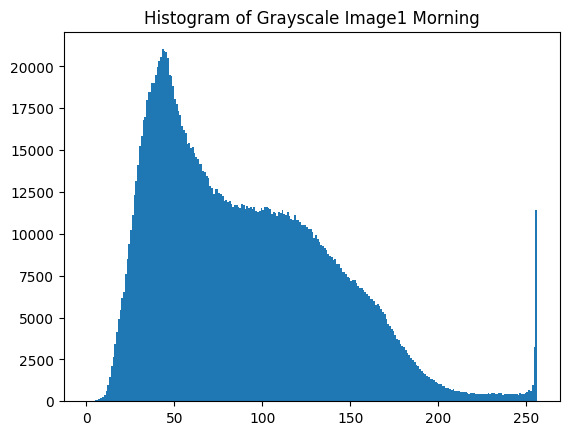

Image1 Afternoon Shape: (1200, 1600, 3)


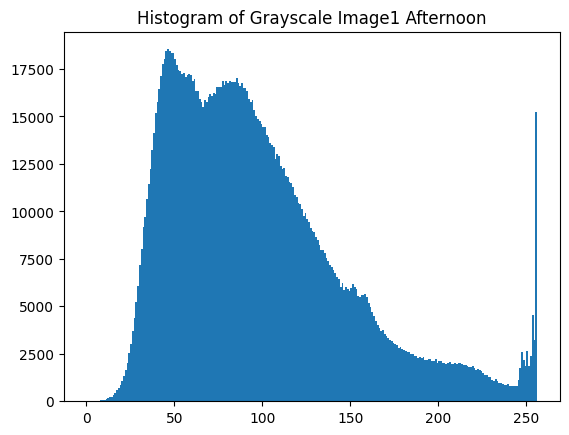

Image1 Sunset Shape: (1200, 1600, 3)


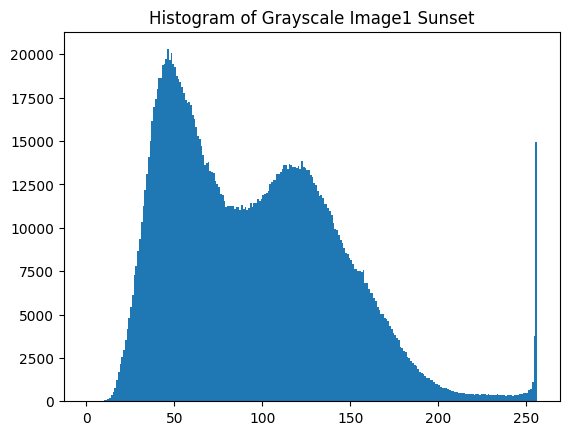

Image2 Morning Shape: (1200, 1600, 3)


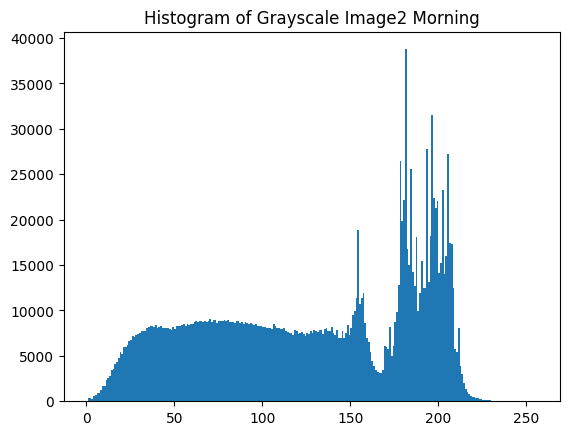

Image2 Afternoon Shape: (1200, 1600, 3)


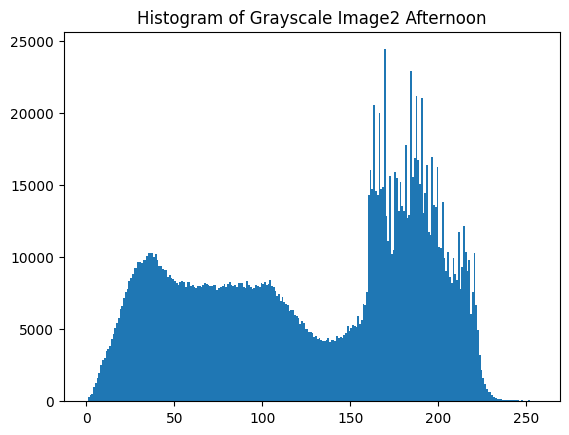

Image2 Sunset Shape: (1200, 1600, 3)


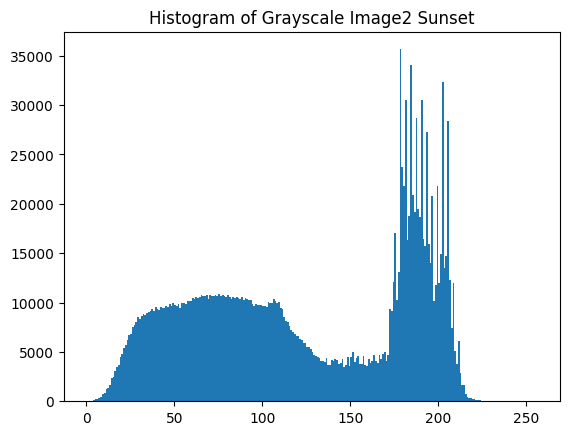

Image3 Morning Shape: (1200, 1600, 3)


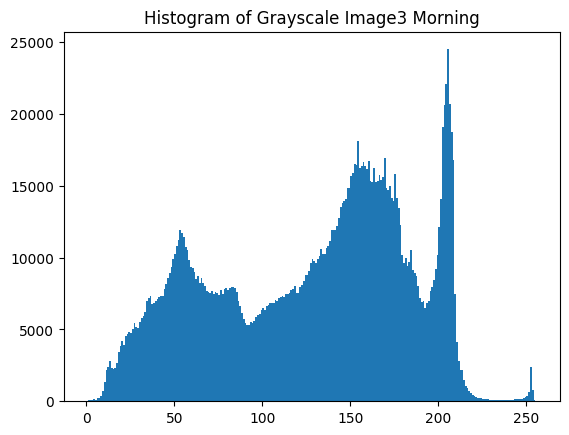

Image3 Afternoon Shape: (1200, 1600, 3)


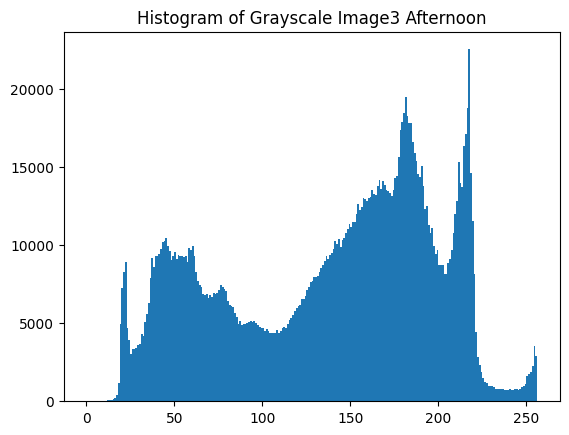

Image3 Sunset Shape: (1200, 1600, 3)


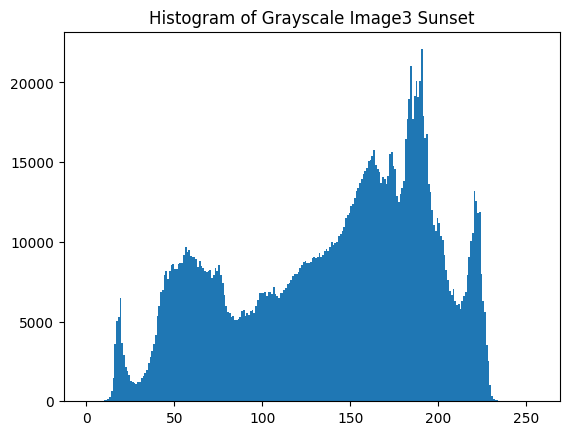

Image4 Morning Shape: (1200, 1600, 3)


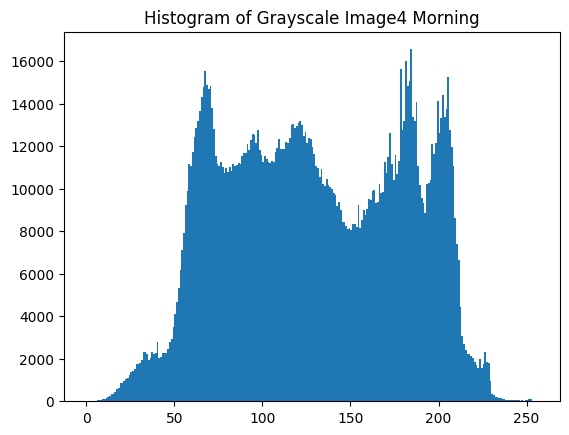

Image4 Afternoon Shape: (1200, 1600, 3)


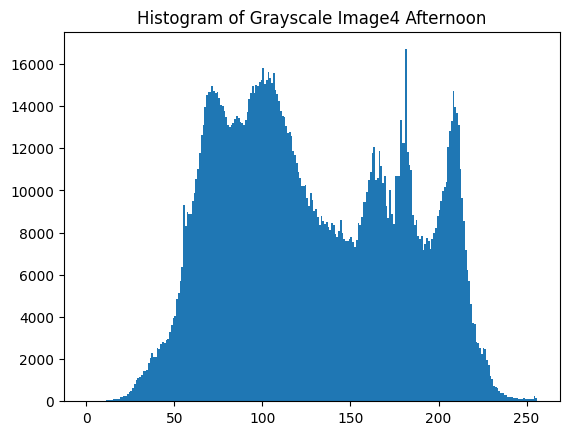

Image4 Sunset Shape: (1200, 1600, 3)


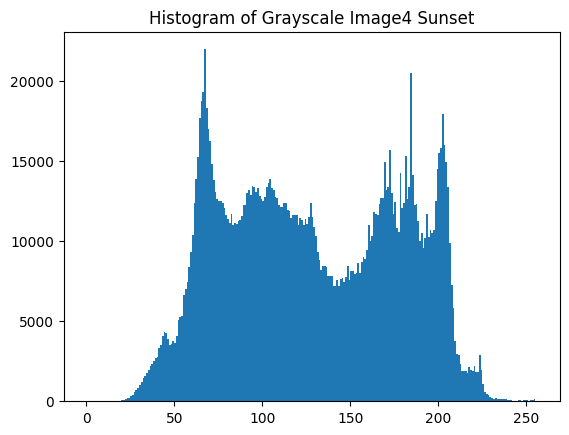

In [16]:
for i in range(1, 5):
    # Load images with variations and convert them to grayscale
    image_morning = cv2.cvtColor(cv2.imread("image"+str(i)+"_morning.jpeg"), cv2.COLOR_BGR2GRAY)
    image_afternoon = cv2.cvtColor(cv2.imread("image"+str(i)+"_afternoon.jpeg"), cv2.COLOR_BGR2GRAY)
    image_sunset = cv2.cvtColor(cv2.imread("image"+str(i)+"_sunset.jpeg"), cv2.COLOR_BGR2GRAY)

    # Display images and plot their histogram
    cv2.imshow("Image"+str(i)+" Morning", image_morning)
    print(f"Image{i} Morning Shape: {image.shape}")
    plt.hist(image_morning.ravel(), 256, [0, 256])
    plt.title(f"Histogram of Grayscale Image{i} Morning")
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    cv2.imshow("Image"+str(i)+" Afternoon", image_afternoon)
    print(f"Image{i} Afternoon Shape: {image.shape}")
    plt.hist(image_afternoon.ravel(), 256, [0, 256])
    plt.title(f"Histogram of Grayscale Image{i} Afternoon")
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    cv2.imshow("Image"+str(i)+" Sunset", image_sunset)
    print(f"Image{i} Sunset Shape: {image.shape}")
    plt.hist(image_sunset.ravel(), 256, [0, 256])
    plt.title(f"Histogram of Grayscale Image{i} Sunset")
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

1. (d)

In [ ]:
# Apply the transformations for image
for i in range(1, 5):
    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        gamma_corrected = gamma_transformation(image)

        # Display the result
        cv2.imshow("Gamma Corrected "+j[1:], gamma_corrected)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        negative_image = negative_transformation(image)

        # Display the result
        cv2.imshow("Negative Image "+j[1:], negative_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        log_transformed = logarithmic_transformation(image)

        # Display the result
        cv2.imshow("Logarithmic Transformed "+j[1:], log_transformed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        contrast_stretched = contrast_stretching(image)

        # Display the result
        cv2.imshow("Contrast Stretched "+j[1:], contrast_stretched)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [21]:
import pandas as pd
from scipy import stats

2. (a)

In [22]:
def calculate_statistics(image):
    # Split the image into color channels
    r, g, b = cv2.split(image)

    # Calculate statistics for each channel
    stats_r = {
        "max": np.max(r),
        "min": np.min(r),
        "mean": np.mean(r),
        "mode": stats.mode(r, axis=None)[0]
    }
    stats_g = {
        "max": np.max(g),
        "min": np.min(g),
        "mean": np.mean(g),
        "mode": stats.mode(g, axis=None)[0]
    }
    stats_b = {
        "max": np.max(b),
        "min": np.min(b),
        "mean": np.mean(b),
        "mode": stats.mode(b, axis=None)[0]
    }
    
    return stats_r, stats_g, stats_b

# Initialize a list to store the statistics
data = []

# Load images and calculate statistics
image_variations = {
    "image1_morning": "Morning, Dim",
    "image1_afternoon": "Afternoon, Bright",
    "image1_sunset": "Sunset, Dim",
    "image2_morning": "Morning, Dim",
    "image2_afternoon": "Afternoon, Bright",
    "image2_sunset": "Sunset, Dim",
    "image3_morning": "Morning, Dim",
    "image3_afternoon": "Afternoon, Bright",
    "image3_sunset": "Sunset, Dim",
    "image4_morning": "Morning, Dim",
    "image4_afternoon": "Afternoon, Bright",
    "image4_sunset": "Sunset, Dim"
}

for image_name, lighting in image_variations.items():
    image = cv2.imread(f"{image_name}.jpeg")
    stats_r, stats_g, stats_b = calculate_statistics(image)
    
    # Append the statistics to the data list
    data.append([image_name, "Red", stats_r["max"], stats_r["min"], stats_r["mean"], stats_r["mode"], lighting])
    data.append([image_name, "Green", stats_g["max"], stats_g["min"], stats_g["mean"], stats_g["mode"], lighting])
    data.append([image_name, "Blue", stats_b["max"], stats_b["min"], stats_b["mean"], stats_b["mode"], lighting])

# DataFrame to store the results
columns = ["Image", "Channel", "Max", "Min", "Mean", "Mode", "Lighting"]
df = pd.DataFrame(data, columns=columns)

print(df)

               Image Channel  Max  Min        Mean  Mode           Lighting
0     image1_morning     Red  255    0   84.355084    45       Morning, Dim
1     image1_morning   Green  255    0   91.069237    40       Morning, Dim
2     image1_morning    Blue  255    0   89.681707    45       Morning, Dim
3   image1_afternoon     Red  255    0   94.397543   255  Afternoon, Bright
4   image1_afternoon   Green  255    0  101.480464   255  Afternoon, Bright
5   image1_afternoon    Blue  255    0   91.334553    59  Afternoon, Bright
6      image1_sunset     Red  255    0   90.565123    44        Sunset, Dim
7      image1_sunset   Green  255    2   96.000179    43        Sunset, Dim
8      image1_sunset    Blue  255    0   95.127281    46        Sunset, Dim
9     image2_morning     Red  252    0  108.877235     0       Morning, Dim
10    image2_morning   Green  252    0  134.873823   182       Morning, Dim
11    image2_morning    Blue  255    0  117.612683   171       Morning, Dim
12  image2_a

1. Lighting Conditions and Brightness Levels:
Morning: The morning lighting condition generally results in moderate brightness. For example, in image1_morning, the mean values for the Red, Green, and Blue channels are relatively lower (around 84-91), suggesting a balanced brightness with no channel dominating the others.
Afternoon: The afternoon lighting tends to be brighter, as seen from the increase in mean values for all channels. For instance, image1_afternoon shows an increase in the mean for the Red channel (94.39) compared to the morning, indicating stronger lighting during the afternoon.
Sunset: The sunset lighting is dimmer compared to the afternoon. In most images, the mean values slightly decrease during sunset, but still remain somewhat high, indicating a warmer, dimmer light source typical of sunset scenes (e.g., image1_sunset has a mean of 90.56 for the Red channel, slightly lower than the afternoon).
2. Color Balance:
The mean and mode values provide insights into the color distribution. If one channel has consistently higher values compared to others, it could indicate a color dominance in the image.
For example, in image1_afternoon, the Green channel has a mean of 101.48, slightly higher than the other channels. This suggests a possible dominance of green during the afternoon light, possibly due to reflections from natural surroundings.
In image3_morning, the Blue channel has a higher mean (132.69) compared to Red (123.63) and Green (125.88), indicating a cooler tone during the morning.
3. Dynamic Range and Contrast:
The dynamic range, represented by the difference between the max and min values (always 255), suggests that the images capture a wide range of brightness levels, from dark shadows to bright highlights. This is consistent across different lighting conditions.
The mode values (most frequent pixel values) provide additional insight into the predominant tones in the images. For example, in image2_morning, the mode for the Green and Blue channels is high (182 and 171, respectively), suggesting that these values represent the dominant color tones in the image. In contrast, the Red channel has a mode of 0, indicating the presence of dark red regions in the image.

2. (b)

In [ ]:
# Apply the transformations for image
for i in range(1, 5):
    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        gamma_corrected = gamma_transformation(image)

        # Plot histogram
        plt.hist(gamma_corrected.ravel(), 256, [0, 256])
        plt.title(f"Histogram of gamma_corrected image{i}{j}")
        plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        negative_image = negative_transformation(image)

        # Plot histogram
        plt.hist(negative_image.ravel(), 256, [0, 256])
        plt.title(f"Histogram of negative image{i}{j}")
        plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        log_transformed = logarithmic_transformation(image)

        # Plot histogram
        plt.hist(log_transformed.ravel(), 256, [0, 256])
        plt.title(f"Histogram of log_transformed image{i}{j}")
        plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    for j in ["_morning", "_afternoon", "_sunset"]:
        image = cv2.cvtColor(cv2.imread(f"image{i}{j}.jpeg"), cv2.COLOR_BGR2GRAY)

        contrast_stretched = contrast_stretching(image)

        # Plot histogram
        plt.hist(contrast_stretched.ravel(), 256, [0, 256])
        plt.title(f"Histogram of contrast_stretched image{i}{j}")
        plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Rear Camera Setup:
Main Camera:
Resolution: 48 MP, f/1.8 aperture
Features: Optical Image Stabilization (OIS), PDAF (Phase Detection Auto Focus)
Ultra-Wide Camera:
Resolution: 8 MP, f/2.2 aperture
Field of View: 123°
Macro Camera:
Resolution: 5 MP, f/2.4 aperture
Depth Sensor:
Resolution: 2 MP, f/2.4 aperture

The presence of both high and low pixel intensities across the Red, Green, and Blue channels reflect the camera's ability to adapt to different environments. The main 48 MP sensor with Optical Image Stabilization (OIS) likely helped in capturing clearer images even in dimmer light (e.g., during Sunset). 

2. (c)

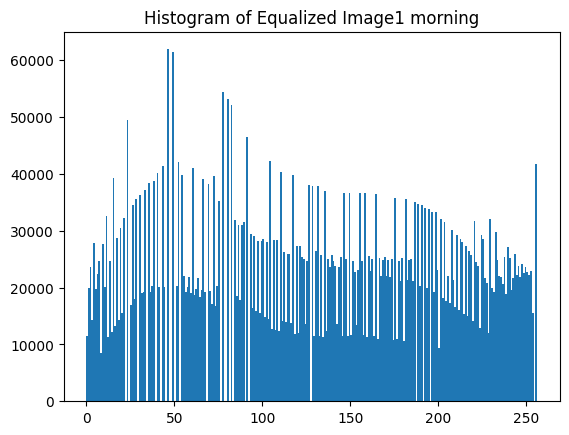

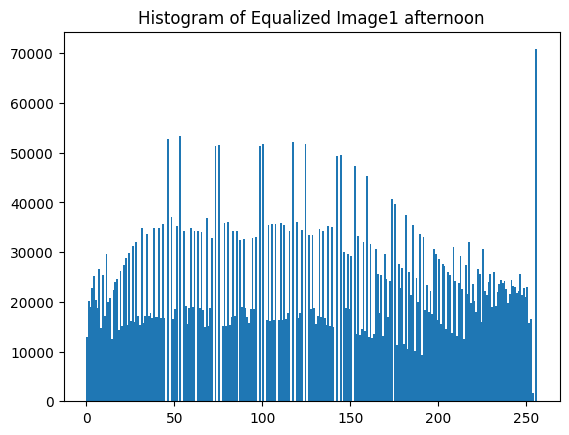

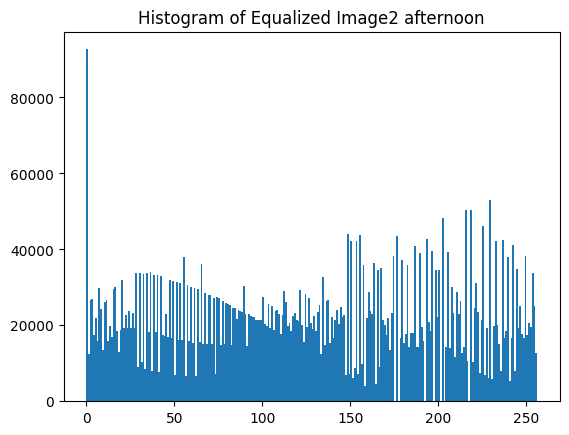

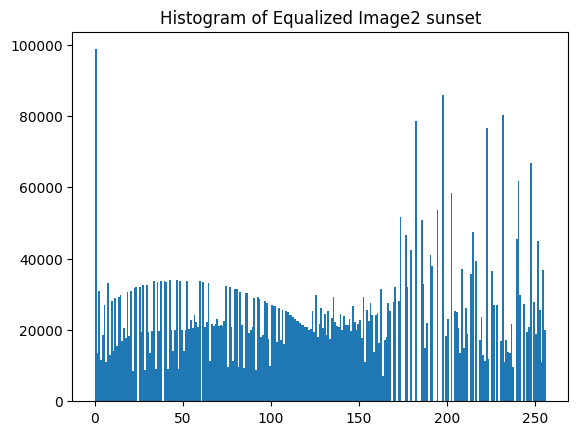

In [23]:
image = cv2.imread("image1_morning.jpeg")

b, g, r = cv2.split(image)

# Apply histogram equalization
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

equalized_image = cv2.merge([equalized_b, equalized_g, equalized_r])

# Display the results
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Color Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram of equalized image
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histogram of Equalized Image1 morning")
plt.show()

image = cv2.imread("image1_afternoon.jpeg")

b, g, r = cv2.split(image)

# Apply histogram equalization
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

equalized_image = cv2.merge([equalized_b, equalized_g, equalized_r])

# Display the results
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Color Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram of equalized image
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histogram of Equalized Image1 afternoon")
plt.show()

image = cv2.imread("image2_afternoon.jpeg")

b, g, r = cv2.split(image)

# Apply histogram equalization
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

equalized_image = cv2.merge([equalized_b, equalized_g, equalized_r])

# Display the results
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Color Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram of equalized image
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histogram of Equalized Image2 afternoon")
plt.show()

image = cv2.imread("image2_sunset.jpeg")

b, g, r = cv2.split(image)

# Apply histogram equalization
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

equalized_image = cv2.merge([equalized_b, equalized_g, equalized_r])

# Display the results
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Color Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram of equalized image
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histogram of Equalized Image2 sunset")
plt.show()

# Histogram equalization enhances contrast but can lead to noise amplification in low-quality images.

2. (d)

In [26]:
from skimage import exposure

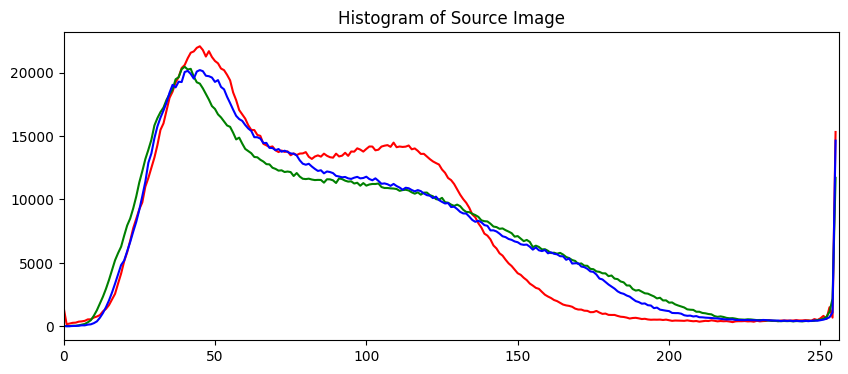

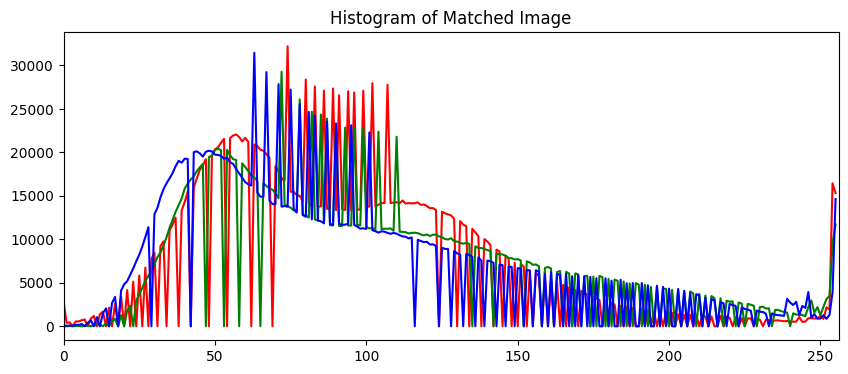

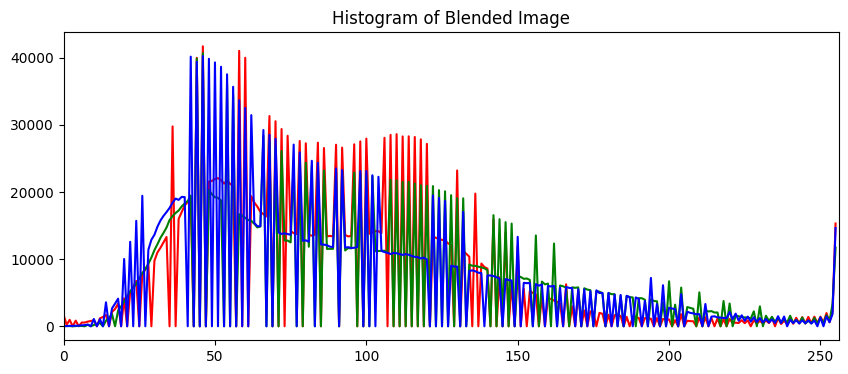

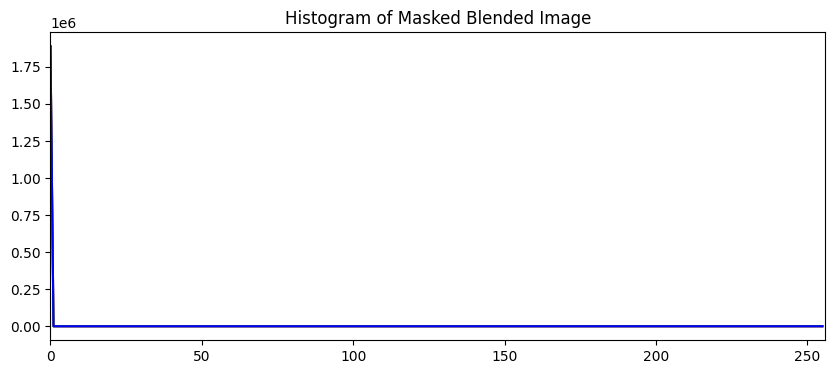

In [27]:
def histogram_matching(source_img, reference_img):
    # Perform histogram matching for images
    matched_img = np.zeros_like(source_img)
    for i in range(3):  # For each color channel
        matched_img[:, :, i] = exposure.match_histograms(source_img[:, :, i], reference_img[:, :, i])
    return matched_img

def alpha_blending(image1, image2, alpha):
    # Perform alpha blending between two images
    return cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)

# Load source and reference images
source_img = cv2.imread('image1_morning.jpeg')
reference_img = cv2.imread('image1_afternoon.jpeg')

# Perform histogram matching
matched_image = histogram_matching(source_img, reference_img)

# Alpha blending between original and matched images
alpha = 0.5
blended_image = alpha_blending(source_img, matched_image, alpha)

# Display the original, matched, and blended images
cv2.imshow("Source Image", source_img)
cv2.imshow("Histogram Matched Image", matched_image)
cv2.imshow("Blended Image", blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histograms for comparison
def plot_histograms(image, title):
    plt.figure(figsize=(10, 4))
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(title)
    plt.show()

# Plot histograms for the images
plot_histograms(source_img, "Histogram of Source Image")
plot_histograms(matched_image, "Histogram of Matched Image")
plot_histograms(blended_image, "Histogram of Blended Image")

def blend_with_mask(image1, image2, mask, alpha):
    # Blend two images using a mask and alpha blending
    blended_image = np.zeros_like(image1)
    for i in range(3):  
        blended_image[:, :, i] = cv2.addWeighted(image1[:, :, i], alpha, image2[:, :, i], 1 - alpha, 0)
    # Apply the mask
    masked_blended_image = cv2.bitwise_and(blended_image, blended_image, mask=mask)
    return masked_blended_image

# Create a mask
mask = np.zeros(source_img.shape[:2], dtype="uint8")
cv2.circle(mask, (source_img.shape[1] // 2, source_img.shape[0] // 2), 100, 255, -1)

# Blend with mask
masked_blended_image = blend_with_mask(source_img, matched_image, mask, alpha)

# Display the masked blended image
cv2.imshow("Masked Blended Image", masked_blended_image)
cv2.imshow("Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram of the masked blended image
plot_histograms(masked_blended_image, "Histogram of Masked Blended Image")
